In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
# Let's ignore warnings for now
import warnings
warnings.filterwarnings('ignore')
#import missingno


# Importing the Data

In [5]:
data=pd.read_csv(r'C:\Users\DELL\Desktop\Chicago_Crime_Detective.csv')

In [24]:
data.head(15)

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
5,5,8950793,12/31/12 20:30,STREET,True,False,2521,25,19,2012
6,6,8950760,12/31/12 20:10,STREET,False,False,423,4,48,2012
7,7,8951611,12/31/12 20:00,STREET,False,False,231,2,40,2012
8,8,8951802,12/31/12 19:00,STREET,True,False,1021,10,29,2012
9,9,8950706,12/31/12 18:00,STREET,False,False,1215,12,24,2012


# Data Descriptions
1. ID: a unique identifier for each observation.

2. Date: the date the crime occurred.
LocationDescription: the location where the crime occurred.

3. Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made).

4. Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic).

5. Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.

6. District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.

7. CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

8. Year: the year in which the crime occurred.
 
Latitude: the latitude of the location at which the crime occurred.

In [8]:
data.describe()

,Unnamed: 0,ID,Beat,Year
count,191641.000000,1.916410e+05,191641.000000,191641.000000
mean,95820.000000,4.968629e+06,1258.810771,2006.134940
std,55322.135806,2.342997e+06,702.530465,3.520285
min,0.000000,1.310022e+06,111.000000,2001.000000
25%,47910.000000,2.832144e+06,722.000000,2003.000000
50%,95820.000000,4.762956e+06,1121.000000,2006.000000
75%,143730.000000,7.201878e+06,1733.000000,2009.000000
max,191640.000000,9.181151e+06,2535.000000,2012.000000


In [7]:
#Discovering the datatypes for each column
data.dtypes

Unnamed: 0              int64
ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

# What missing values are there?

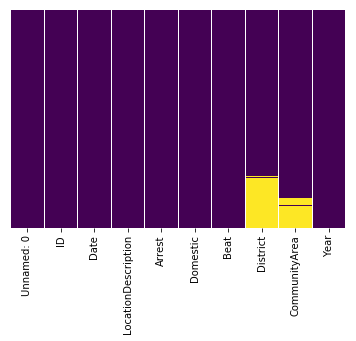

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Ok we see some missing values here(District and CommunityArea
It's important to visualize your missing data the momemt you have your dataset.
These are like holes in your Data,needs to be taken care of

In [79]:
data['District']

0          6.0
1         12.0
2         16.0
3          7.0
4          2.0
5         25.0
6          4.0
7          2.0
8         10.0
9         12.0
10        10.0
11         7.0
12         9.0
13         8.0
14        18.0
15         8.0
16        17.0
17         1.0
18         5.0
19        18.0
20         4.0
21        19.0
22         9.0
23         3.0
24         9.0
25        10.0
26         2.0
27        19.0
28        15.0
29         8.0
          ... 
191611     NaN
191612     NaN
191613     NaN
191614     NaN
191615     NaN
191616     NaN
191617     NaN
191618     NaN
191619     NaN
191620     NaN
191621     NaN
191622     NaN
191623     NaN
191624     NaN
191625     NaN
191626     NaN
191627     NaN
191628     NaN
191629     NaN
191630     NaN
191631     NaN
191632     NaN
191633     NaN
191634     NaN
191635     NaN
191636     NaN
191637     NaN
191638     NaN
191639     NaN
191640     NaN
Name: District, Length: 191641, dtype: float64

In [73]:
#CHANGING THE DATATYPE AS DISTRICT WAS AN OBJECT
data['District']=pd.to_numeric(data['District'],errors='signed')
data['District'].dtype
#missing_data=data.District.dropna()


dtype('float64')

In [77]:
x=data['District'].mean()

In [78]:
#Let's try fill in the missing values.
#Using the statisical approach
#.fillna():-filling the missing values with mean of the non_missing values.
data['District'].fillna(x)

0          6.000000
1         12.000000
2         16.000000
3          7.000000
4          2.000000
5         25.000000
6          4.000000
7          2.000000
8         10.000000
9         12.000000
10        10.000000
11         7.000000
12         9.000000
13         8.000000
14        18.000000
15         8.000000
16        17.000000
17         1.000000
18         5.000000
19        18.000000
20         4.000000
21        19.000000
22         9.000000
23         3.000000
24         9.000000
25        10.000000
26         2.000000
27        19.000000
28        15.000000
29         8.000000
            ...    
191611    11.817485
191612    11.817485
191613    11.817485
191614    11.817485
191615    11.817485
191616    11.817485
191617    11.817485
191618    11.817485
191619    11.817485
191620    11.817485
191621    11.817485
191622    11.817485
191623    11.817485
191624    11.817485
191625    11.817485
191626    11.817485
191627    11.817485
191628    11.817485
191629    11.817485


In [59]:
#Let's try fill in the missing values.
#Using the statisical approach
data.District.isnull().sum()

0

In [60]:
data.shape

(191641, 10)

# What is the Month and Year of the median date in our dataset? *

In [49]:
n=len(data)

In [50]:

x=(n+1)/2
med=int(x)

In [51]:
data['Date'][med]

'5/21/06 12:00'

# In which month did the lowest motor vehicle thefts occur? 

In [52]:
data.Beat.dtype

dtype('int64')

In [53]:
data[data['Beat']==130]

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
116535,116535,3822759,2/21/05 8:40,STREET,False,False,130,1,32,2005


In [93]:
data.Date.value_counts().idxmax()

'5/16/08 0:00'

LET US CHANGE THE DATE COLUMN SEPARATELY:YEAR MONTH DAY

In [61]:
data['month'] = pd.DatetimeIndex(data['Date']).month
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,12
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,12
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,12
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,12


In [62]:
data['day'] = pd.DatetimeIndex(data['Date']).day
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,12,31
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,12,31
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,31
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,12,31
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,12,31


# USING THE VISUALIZATION WE INFER THAT:
1.CRIME DECREASES FROM 2002-2012
2.CRIME INCREASES  FROM 2009-2011

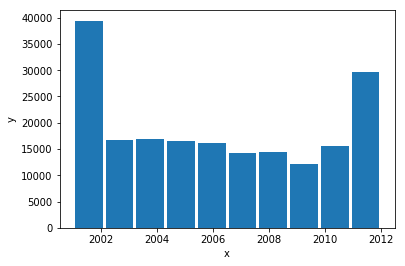

In [80]:
import matplotlib.pyplot as plt
bins=10
plt.hist(data['Year'],bins,rwidth=0.9)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? *

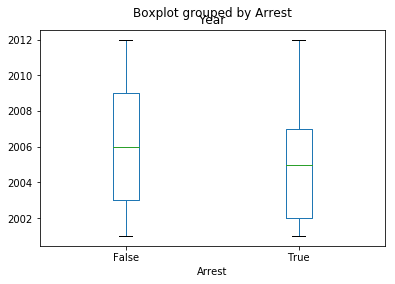

In [81]:
data.boxplot(by ='Arrest', column =['Year'], grid = False) 
#Inferring the boxplot we get to know that there is more area covering first half of the TRUE plot

# For what proportion of motor vehicle thefts in 2001 was an arrest made?

In [82]:
#movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()
tot=data[(data.Arrest==True) & (data.Year ==2001)]
x=len(tot)
x

2152

In [83]:
y=data[data['Year']==2001]

z=(x/len(y))
print(z)

0.10411727708161982


# For what proportion of motor vehicle thefts in 2007 was an arrest made?

In [84]:
tot2=data[(data.Arrest==True) & (data.Year==2007)]
x1=len(tot2)


In [85]:
y1=data[data['Year']==2007]
z1=(x1/len(y1))
round(z1,2)

0.08

# Which locations are the top five locations for motor vehicle thefts,

In [86]:
k=data.LocationDescription.value_counts()
top5=k.head(6)
top5

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

# Create a subset of your data, only taking observations for which the theft happened in one of these five locations,

In [87]:
x=['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','GAS STATION','DRIVEWAY - RESIDENTIAL']
TOP5=data[data['LocationDescription'].isin(x)]

In [88]:
len(TOP5)

177510

In [213]:
t=TOP5[TOP5['LocationDescription']=='GAS STATION']

In [216]:
t1=TOP5.Date.value_counts().idxmax()

In [217]:
t1

'5/16/08 0:00'

In [218]:
import datetime
import calendar
dt=datetime.datetime.strptime(t1, '%m/%d/%y %H:%M').weekday()
hl=calendar.day_name[dt]
print(hl)

Friday
